# Arbutus Firecracker 10K : Comparing 2020 virtual race time to previous four years

This Notebook takes information posted by the Arbutus Firecracker 10K, creates a .csv file for each year, creates data frames from each, calculates average times for runners from 2016-2019, and compares times of the runners of the 2020 virtual race with their average for previous in person racing. 

There are obvious limitations for this approach. Few hearty souls ran the 2020 race. Runners this year could pick any course, which could vary greatly from the challenging in person race. 2020 times were self reported on the honor system. 

To run this notebook, use Cell- Run All. The final column ('Actual vs. Virtual') shows the difference between the average and the 2020 time. If the number is positive, it is an improvement/ faster than average. If the time is negative, it is slower than average. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_2016 = pd.read_csv('Firecracker10k_2016.csv') #imports .csv's to data frames
df_2017 = pd.read_csv('Firecracker10k_2017.csv')
df_2018 = pd.read_csv('Firecracker10k_2018.csv')
df_2019 = pd.read_csv('Firecracker10k_2019.csv')
df_2020 = pd.read_csv('Firecracker10K_2020.csv')

In [5]:
df_2017['Name'] = df_2017['First '] + ' ' + df_2017['Last '] #add a column for both names
df_2020['Name'] = df_2020['First'] + ' ' + df_2020['Last'] #add a column for both names

In [6]:
df_2016.columns = df_2016.columns.str.replace('Time', '2016 Time') #add year to time column name
df_2017.columns = df_2017.columns.str.replace('Time Chip', '2017 Time Chip')
df_2018.columns = df_2018.columns.str.replace('Time', '2018 Time')
df_2019.columns = df_2019.columns.str.replace('Time', '2019 Time')
df_2020.columns = df_2020.columns.str.replace('Time', '2020 Time')

In [7]:
df_2016 = df_2016.rename(columns = lambda x: x.strip()) #take out spaces from column names, a bit late in the game
df_2017 = df_2017.rename(columns = lambda x: x.strip())
df_2018 = df_2018.rename(columns = lambda x: x.strip())
df_2019 = df_2019.rename(columns = lambda x: x.strip())
df_2020 = df_2020.rename(columns = lambda x: x.strip())

In [8]:
#merge data frames one at a time, keeping the columns I'll need
df_20AND19 = pd.merge(left=df_2020[['2020 Time', 'Name']], right=df_2019[['Name', '2019 Time']], on='Name', how='left')
df_20TO18 = pd.merge(left=df_20AND19[['2020 Time', 'Name', '2019 Time']], right=df_2018[['Name', '2018 Time']], on='Name', how='left')
df_20TO17 = pd.merge(left=df_20TO18[['2020 Time', 'Name', '2019 Time', '2018 Time']], right=df_2017[['Name', '2017 Time Chip']], on='Name', how='left')
df_20TO16 = pd.merge(left=df_20TO17[['2020 Time', 'Name', '2019 Time', '2018 Time', '2017 Time Chip']], right=df_2016[['Name', '2016 Time']], on='Name', how='left')

In [9]:
df_20TO16['2019 Time'] = pd.to_timedelta(df_20TO16['2019 Time']) #changes times from text to time delta
df_20TO16['2018 Time'] = pd.to_timedelta(df_20TO16['2018 Time'])
df_20TO16['2017 Time Chip'] = pd.to_timedelta(df_20TO16['2017 Time Chip'])
df_20TO16['2016 Time'] = pd.to_timedelta(df_20TO16['2016 Time'])
df_20TO16['2020 Time'] = pd.to_timedelta(df_20TO16['2020 Time'])

In [10]:
df_20TO16['Average'] = df_20TO16[['2019 Time', '2018 Time', '2017 Time Chip', '2016 Time']].mean(axis=1) #create a column for average 
df_20TO16['Average vs. Virtual'] = df_20TO16['Average']-df_20TO16['2020 Time']#create column to compare average to 2020 time
df_20TO16['Average vs. Virtual'] = df_20TO16['Average vs. Virtual']/np.timedelta64(1,'s')

In [11]:
#try to make the result in the final column make sense to people 
def pretty_time_delta(seconds):
    if pd.isnull(seconds): 
        return seconds
    sign_string = '-' if seconds < 0 else ''
    seconds = abs(int(seconds))
    days, seconds = divmod(seconds, 86400)
    hours, seconds = divmod(seconds, 3600)
    minutes, seconds = divmod(seconds, 60)
    if days > 0:
        return '%s%dd%dh%dm%ds' % (sign_string, days, hours, minutes, seconds)
    elif hours > 0:
        return '%s%dh%dm%ds' % (sign_string, hours, minutes, seconds)
    elif minutes > 0:
        return '%s%dm%ds' % (sign_string, minutes, seconds)
    else:
        return '%s%ds' % (sign_string, seconds)
    
df_20TO16['Average vs. Virtual'] = df_20TO16['Average vs. Virtual'].apply(pretty_time_delta)
display(df_20TO16)

,2020 Time,Name,2019 Time,2018 Time,2017 Time Chip,2016 Time,Average,Average vs. Virtual
0,0 days 00:41:41,Chris Colclough,NaT,NaT,NaT,NaT,NaT,NaN
1,0 days 00:42:26,Phil Lang,NaT,NaT,0 days 00:42:13.900000,NaT,0 days 00:42:13.900000,-12s
2,0 days 00:44:52,Martin Goode,NaT,NaT,0 days 00:45:28.600000,NaT,0 days 00:45:28.600000,36s
3,0 days 00:45:23,Sigurd Knippengard,NaT,NaT,NaT,NaT,NaT,NaN
4,0 days 00:46:18,Pamela Jock,NaT,NaT,NaT,NaT,NaT,NaN
5,0 days 00:47:48,Brent Smith,0 days 00:57:18,0 days 01:04:14,NaT,NaT,0 days 01:00:46,12m58s
6,0 days 00:47:49,Dennis Albright,0 days 00:44:56,0 days 00:46:30,NaT,NaT,0 days 00:45:43,-2m6s
7,0 days 00:50:12,Aggie Wojdon,NaT,NaT,NaT,0 days 00:53:24,0 days 00:53:24,3m12s
8,0 days 00:52:53,Robert Roa,NaT,0 days 00:48:08,0 days 00:43:57.600000,0 days 00:45:26,0 days 00:45:50.533333333,-7m2s
9,0 days 00:56:18,Kari Whitmer,0 days 00:57:23,NaT,NaT,NaT,0 days 00:57:23,1m5s


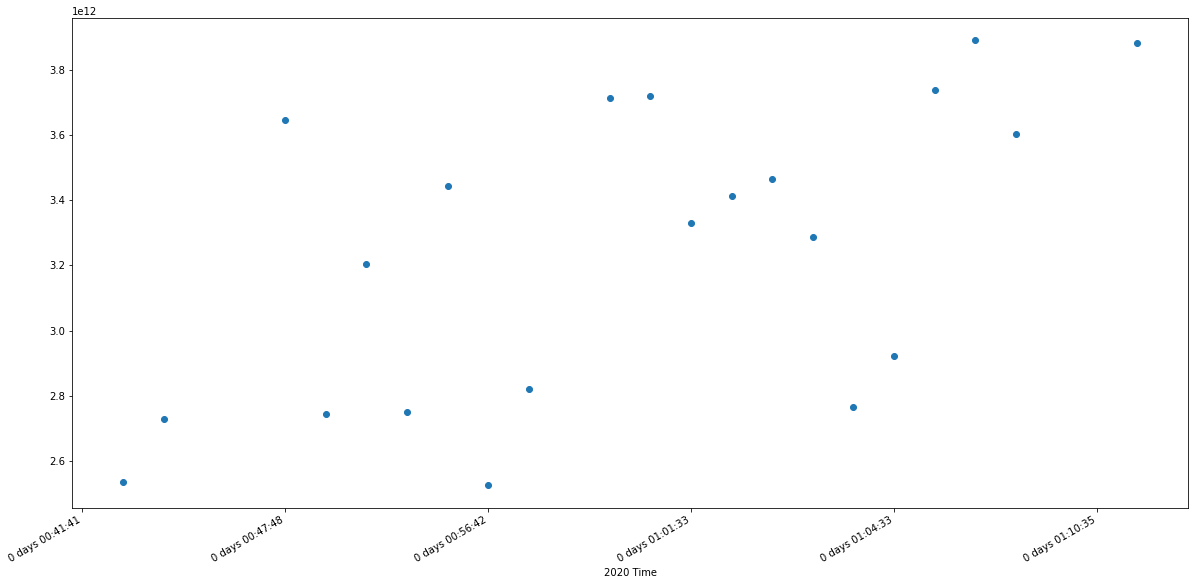

In [12]:
df_20TO16.plot(x='2020 Time', y='Average', style='o', legend=None, figsize=(20,10))